<a id=TOC></a>  
__Unit 4 Practical Session Demo: Linear Regression & Gradient Descent__  
`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

# Unit 04 Linear Regression plus practical tips


## Learning objectives
1. Review Simple Linear regression via gradient descent (and brute force)
* Feature selection using SelectKBest features.
* You will learn how to deal with missing data
* You will learn how to handle categorical input and output features (we will go deeper here in future lectures)
* Feature scaling thru standardizing.

## Reading material: 

* Chapter 4 in the following book provides a great parallel to this notebook. Please read it:
  * Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017



<a id=intro></a>
# Introduction to Linear Regression (via GD)

In this demo, we'll use Linear Regression as a simple example in order to explore key topics related to distributed learning of parametric models. Broadly speaking, the supervised learning of a parametric model can be split into to two components:
1. **Prediction Task**: Given an input vector, return an output value.
2. **Optimization Task (a.k.a. Learning)**: Given a strategy for making a prediction, return the specific parameters which guarantee the optimal prediction.


OK, Let's start with a quick review of some notation you will have seen previously. 

## Notation Review

Linear Regression tackles the __prediction task__ by assuming that we can compute our output variable, $y$, using a linear combination of our input variables. That is we assume there exist a set of **weights**, $\mathbf{w}$, and a **bias** term, $\mathbf{b}$, such that for any input $\mathbf{x}_j \in \mathbb{R}^n$:

\begin{equation}\tag{1.1}
\hat{y}_j = \displaystyle\sum_{i=1}^{n}{w_i\cdot x_{ji} + b}
\end{equation}

In vector notation, this can be written: 
\begin{equation}
\hat{y}_j = \displaystyle{\mathbf{w}^T\mathbf{x}_{j} + b}
\end{equation}

Of course, this perfect linear relationship never holds over a whole dataset **$X$**, so Linear Regression attempts to fit (i.e. **learn**) the best line (in 1 dimension) or hyperplane (in 2 or more dimensions) to the data.  In the case of **ordinary least squares (OLS)** linear regression, best fit is defined as minimizing the Euclidean distances of each point in the dataset to the line or hyperplane.  These distances are often referred to as **residuals**. 

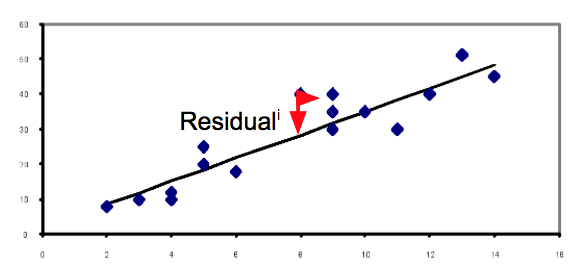

The calculation of the average residual (a.k.a.**mean squared error, MSE**) over our test or training set allows us to measure how good a fit we've achieved. We call this function the **loss** or **objective** function because our goal in the **optimization task** is to find the parameters which minimize it. Given a dataset consisting of  $m$ examples, where each example has $n$ input variables, and a corresponding output variable. We can lay this data out as an $m X n$ matrix, denoted as $X$. 

This equation introduces several very common Machine Learning notations that we
will use throughout this book:

The first row in this input matrix, $X$, is a vector like the following 4-space vector: 



$
  \mathbf{x}^{(1)} = \begin{pmatrix}
  -118.29 \\
  33.91 \\
  1,416 \\
  38,372
  \end{pmatrix}
$

Let's assume this example has target value of 
$
  y^{(1)}=156,400
$


\begin{equation}\tag{1.2}
\hat{y}=f(\mathbf{w}, b) = \frac{1}{m}\sum_{j=1}^{m}\left[ (\mathbf{w}^T\mathbf{x}_j + b) - y_i\right]^2,\\
\textrm{where }   m = \left|X_{\text{train}}\right|
\end{equation}


For convenience, we sometimes choose to think of the bias $b$ as weight $w_{n+1}$. To operationalize this, we'll _augment_ our input vectors by setting $x_{n+1}=1$. This gives us a simpler way to write the loss function:
$$
\mathbf{x}' :=
\begin{bmatrix}
\mathbf{1}\\
\mathbf{x}
.
\end{bmatrix},\quad
\boldsymbol{\theta} :=
\begin{bmatrix}
\mathbf{b}\\
\mathbf{w}
.
\end{bmatrix}
$$

\begin{equation}\tag{1.3}
f(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^{n}\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_i - y_i\right]^2
\end{equation}

Machine Learning packages like `sklearn` and `tensorflow` take this one step further by representing the entire training set in a single matrix were each row is an input vector and each column represents a feature.


The input matrix $X$ will then look like this:

$
  \mathbf{X} = \begin{pmatrix}
  (\mathbf{x}^{(1)})^T \\
  (\mathbf{x}^{(2)})^T\\
  \vdots \\
  (\mathbf{x}^{(1999)})^T \\
  (\mathbf{x}^{(2000)})^T
  \end{pmatrix} = \begin{pmatrix}
  -118.29 & 33.91 & 1,416 & 38,372 \\
  \vdots & \vdots & \vdots & \vdots \\
  \end{pmatrix}
$

Building on this and using the vectorized notation: 


$$
\text{X} =
\begin{bmatrix}
\mathbf{x}_1^{\text{T}}\\
\vdots\\
\mathbf{x}_m^{\text{T}}
\end{bmatrix},\quad
\mathbf{y} = 
\begin{bmatrix}
y_1\\
\vdots\\
y_m
\end{bmatrix}
$$

The predictions for linear regression model can be written in vectorixed form as follows:


\begin{equation}\tag{1.4}
f(\boldsymbol{\theta}) = \frac{1}{m}\|\text{X}\cdot \boldsymbol{\theta} - \mathbf{y}\|_2^2
\end{equation}

As you see here, it is customary to write loss as a function of the parameters $\theta$ (or equivalently $\mathbf{w}$ and $b$). However it is important to note that the MSE loss depends on both the parameters/weights  _and_ the data $X$, we'll talk more about that later.

> __DISCUSSION QUESTIONS:__ 
* _In equation 1.1 what do $x_{ji}$, $w_i$, and $\mathbf{w}$ each represent?_  
* _If we were computing loss over a really large data set what might be the arguments in favor / against using the augmented version of the loss function calculation?_

## Notebook Set Up

In [1]:
# general imports
import sys
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# magic commands
%matplotlib inline
%reload_ext autoreload
%autoreload 2

__IMPORTANT!__ Before we begin, please run the cells in the [Appendix](#Appendix) to generate the supporting files & helper code that we'll use in our demos. When you're done, return here to get started.

In [2]:
# import helper modules
import helperFunc
import linRegFunc

# OPTIONAL - uncomment to print helper file docstrings
print (helperFunc.__doc__)
print (linRegFunc.__doc__)


This file contains helper functions for generating, transforming
and plotting 2 dimensional data to use in testing & for ML demos.

Avaliable functions include:
    augment(X)
    plot2DModels(data, models=[], names = [], title=None)
    plotErrorSurface(data, weight_grid, loss, title=None)



This file contains several helper functions for OLS Linear Regression.

Avaliable functions include:
    OLSloss(X, y, model)
    OLSGradient(X, y, model)
    GDUpdate(X, y, nIter, init_model, learning_rate, verbose = False)
    plotGDProgress(data, models, loss, loss_fxn = OLSLoss, show_contours = True)
    SGDUpdate(X, y, B, nIter, init_model, learning_rate, verbose = False)
    mean_absolute_percentage_error(y_true, y_pred)



<a id=small_ex></a>
## A Small Example


We'll start with a small example training dataset of 5 2-D points:

In [3]:
%%writefile fivePoints.csv
1,2
3,4
5,5
4,3
2,3

Overwriting fivePoints.csv


In [4]:
# load data from file
points = np.genfromtxt("fivePoints.csv", delimiter=',')

Here's what they look like next to a the simplest possible linear model:  $ y = x$

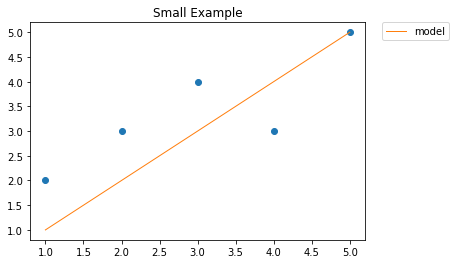

In [5]:
# easy plotting with a helper function
helperFunc.plot2DModels(points, [[1,0]],['model'], title = 'Small Example')

Looks reasonable, but its hard to gauge exactly how good a fit we have just by looking.

> __A TASK FOR YOU:__ Fill in the calculations below to compute the "Training Loss" for our data. These are easy and intuitive calculations that you will know from long-ago math classes... but instead of relying on your visual intuition, challenge yourself to think through these numbers in the context of our matrix equation for loss. Here it is again for your reference:
\begin{equation}\tag{1.3}
f(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_i - y_i\right]^2
\end{equation}


The parameter vector $\theta$ for our initial line $y=x$ shown above is: 
$ \begin{bmatrix} ? \ \quad ? \ \end{bmatrix}$. Fill this is for yourselves. Hint: zero, one
         
The (augmented) data points $x_j$ are:
$ \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}$
$ \begin{bmatrix} 1 \\ 3 \\ \end{bmatrix}$
$ \begin{bmatrix} ? \\ ? \\ \end{bmatrix}$
$ \begin{bmatrix} ? \\ ? \\ \end{bmatrix}$
$ \begin{bmatrix} ? \\ ? \\ \end{bmatrix}$

Our loss calculations will be:

|$i$ |$x$| $y_i$ |$\boldsymbol{\theta}\cdot\mathbf{x}'_i$ | $\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_i - y_i\right]^2$ |
|:---:|:-----:|:-----:|:----------------:|:------------------------:|
|  -   |   X    |true y   |   predicted y   |  squared residual       |
| 1   | 1,1|  2    |           1       |         1    |
| 2   |1,3|   4  |              3    |   1 |
| 3   |1,5 |   5  |                 
| 4   | 1,4|  3    |                
| 5   | 1,2|   3  |                

 The training loss $f(\boldsymbol{\theta})$ for this data and these weights is: _______
 
 

In [6]:
# Run this cell to confirm your Hand Calculations
X = helperFunc.augment(points)[:,:-1]
y = points[:,-1]
print ("Loss:", linRegFunc.OLSLoss(X, y,[1,0]))

Loss: 0.8


<a id=demo1></a>
## Demo: Random Parameter Search.
[Return to Contents](#TOC) | [Skip to Appendix](#Appendix)

Ok, so we know the model looks ok and we know its loss is $0.8$ but is that any good? A naive approach to "learning" a Linear Model might be to randomly generate a few more models and then pick the model with the lowest loss. Let's try it.

Best Random Model: [0, 1], Loss: 0.8


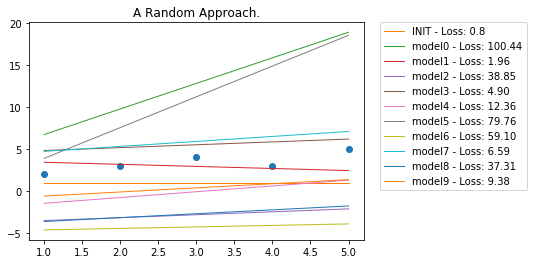

In [7]:
import helperFunc, linRegFunc

#################### Demo Parameters #################### 
# TRY CHANGING THESE & SEE HOW IT AFFECTS OUR SEARCH
NUM_MODELS = 10
PARAM_RANGE = [-5,5]

#################### Random Search Demo ####################
# Load & pre-process data
points = np.genfromtxt("fivePoints.csv", delimiter=',')
X = helperFunc.augment(points)[:,:2]
y = points[:,1]

# "Training"
models = [[0,1]]
names = ["INIT - Loss: 0.8"]
best = {'loss':0.8, 'W': [0,1]}
for idx in range(NUM_MODELS):
    # initialize a random weight vector w/ values in specified range
    W = np.random.uniform(PARAM_RANGE[0],PARAM_RANGE[1], size=(2))
    # compute loss & store for plotting
    loss = linRegFunc.OLSLoss(X, y, W)
    models.append(W)
    names.append("model%s - Loss: %.2f" % (idx, loss))
    # track best model
    if loss < best['loss']:
        best['loss'] = loss
        best['W'] = W
        
# Display Results
print ("Best Random Model: %s, Loss: %s" % (best["W"], best["loss"]))
helperFunc.plot2DModels(points, models, names, "A Random Approach.")

So, that was pretty poor. One idea would be to run a lot more iterations.

> __DISCUSSION QUESTION:__ _To what extent could parallelization help us redeem this approach? What exactly would you parallelize?_

<a id=demo2></a>
## Demo: Systematic Brute Force.
[Return to Contents](#TOC) | [Skip to Appendix](#Appendix)

For obvious reasons a more systematic approach is desirable. Instead of randomly guessing, lets use what we know to search an appropriate section of the the model space.

We can tell from the data that the linear model should probably have a fairly shallow positive slope and a positive intercept between 0 and 2. So lets initialize every possible combination of weights in that range up to a granularity of, say $0.2$, and compute the loss for each one.

Searched 100 models...
Best model: [0.6 1.6], Loss: 0.31999999999999984


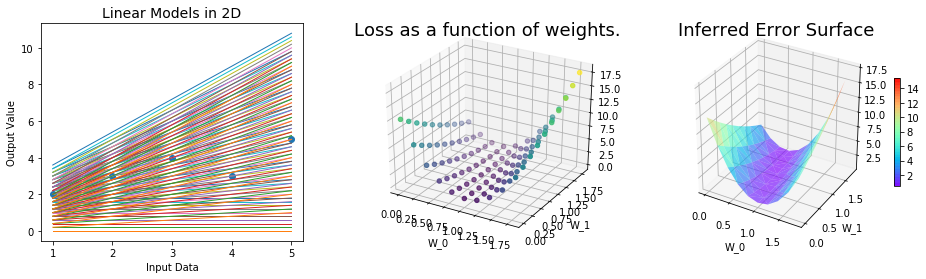

In [8]:
import helperFunc, linRegFunc

#################### Demo Parameters #################### 
# TRY CHANGING THESE & SEE HOW IT AFFECTS OUR SEARCH
W0_MIN = 0
W0_MAX = 2
W0_STEP = 0.2

W1_MIN = 0
W1_MAX = 2
W1_STEP = 0.2

#################### Grid Search Demo #################### 
### Load & Pre-process Data
points = np.genfromtxt("fivePoints.csv", delimiter=',')
X = helperFunc.augment(points)[:,:2]
y = points[:,1]

### "Training" 
# create a model for each point in our grid
grid = np.mgrid[W0_MIN:W0_MAX:W0_STEP,W1_MIN:W1_MAX:W1_STEP]
size = (np.product(grid.shape)/2).astype(int)
models = grid.reshape(2,size).T
# compute loss for each model
loss = []
for W in models:
    loss.append(linRegFunc.OLSLoss(X,y,W))
    
### Display Results
print ("Searched %s models..." %(size))
print ("Best model: %s, Loss: %s" % (models[np.argmin(loss)], min(loss)))
helperFunc.plotErrorSurface(points,models,loss)

> __DISCUSSION QUESTIONS:__ 
* _When we think about scaling up, is this still a better approach than guessing? How could it be parallelized?_ 
* _What would change about this approach if we had higher dimension data?_
* _In practice, when we're training Linear Models why don't we just look at the error surface and identify the lowest point?_
* _What about if we're training other kinds of models?_  

<a id=TL1></a>
## Parameter Space, Gradients, and Convexity

As suggested by the [systematic search demo](#demo2), when we train parametric models we tend to switch back and forth between two different ways of visualizing our goal.

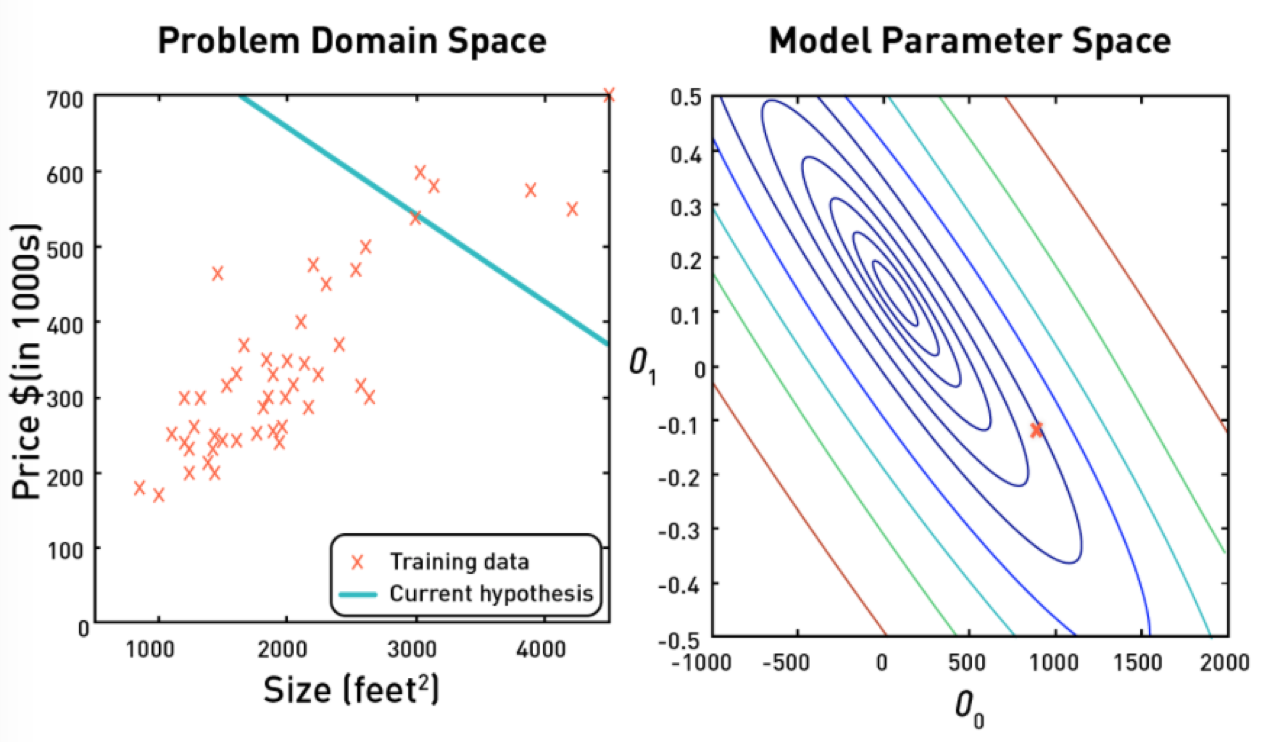

* When we look at a model next to our data represented in the Problem Domain Space, it is natural to think about loss as a measure of _**how far off the data are from our model**_. In other words, this visual suggests loss is a function of the training data $X$.
* By contrast, looking at an error surface plotted in Model Parameter Space, we intuitively see loss as an indicator of _**how far off the current model is from the optimal model**_. In other words, this view helps us think of loss as a function of the parameters $\theta$.

Of course in one sense, this distinction is just a matter of sematics. As we saw in equations 1.2, 1.3 and 1.4, MSE loss depends on _both_ the data and the parameters. However, in the context of 'inventing' ways to train a model, this distinction is a useful one. If we think of the data as fixed and focus on how loss varies _with respect to the parameters_, then we can take advantage of a little theory to speed up our search for the optimal parameters.

__Optimization Theory__

Calculus gives us the simple solution to optimizing a real function. The **First Order Conditions** (a.k.a. 'first derivative rule') says that the maximum or minimum of an unconstrained function must occur at a point where the first derivative = 0. In higher dimensions we extend this rule to talk about a **gradient** vector of partial derivatives which all must equal 0. 

When the first order partial derivatives are equal to zero, then we know we are at a local maximum or minimum of the real function.  But which one is it?  In order to tell, we must take the second derivatives of the real function.  If the second derivatives are positive at that point, then we know we are at a minimum.  If the second derivatives are negative, then we know we are at a maximum.  These are the **second order conditions.**

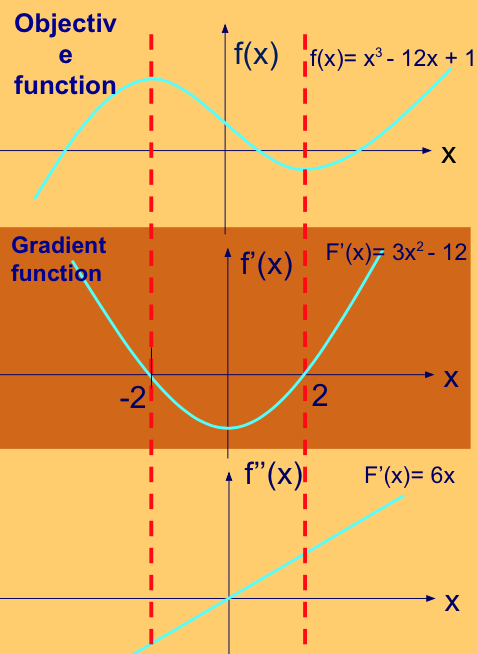

__Convex Optimization__ is the lucky case where we know that the second derivatives never change sign. There are lots of complicated loss functions for which we can't easily visualize the error surface but for which we _can_ prove mathematically that this 2nd order condition is met. If this is the case, then we can think of the suface as _always curving up_ or _always curving down_ which guarantees that any minimum we reach will be an absolute minimum. 

> __DSICUSSION QUESTIONS:__ 
* _In the case of Linear Regression performed on data $X \in \mathbb{R}^m$, how many dimensions does the gradient vector have? What do each of the values in this vector represent visually?_
* _If we are systematically searching the parameter space for a lowest point, why might it be useful to know that our loss function is convex?_ 
* _In general (i.e. beyond Linear Regression) if finding the ideal parameters $\theta$, is as simple as solving the equation $f'(\theta)=0$, why don't we always train our models by solving that equation?_ 

<a id=demo3></a>
## Demo: Gradient Descent
[Return to Contents](#TOC) | [Skip to Appendix](#AppendixA)

To take advantage of these lessons from Optimization Theory, we'll start by taking the derivative of the loss function with respect to the parameters $\boldsymbol{\theta}$. Recall the matrix formulation of our loss function:

\begin{equation}\tag{1.3}
LOSS_{MSE}(\boldsymbol{\theta}) = \frac{1}{n}\sum_{i=1}^{n}\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_i - y_i\right]^2
\end{equation}

We can apply the sum and chain derivation rules to compute the gradient:

\begin{equation}\tag{3.1}
\nabla_{ LOSS_{MSE}}(\boldsymbol{\theta}) = \frac{2}{n}\,\sum_{i=1}^{n}\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_i - y_i\right] \cdot \mathbf{x}'
\end{equation}

We _could_ now set this equation equal to $0$ and then solve for $\boldsymbol{\theta}$... but it turns out that this __closed form solution__ can be computationally challenging in higher dimensions. It also turns out that a simple approximation technique will work almost as well. 

The strategy of **Gradient Descent** is to start somewhere random in the Model Parameter Space and then move down the error surface to find a minimum point with the optimal parameters for our training data. Its ingeniousness is that we can do this without actually knowing the full shape of the error surface. Think of it like walking down a hill while blindfolded. You test each direction to see which way is down, then take a little step in that direction and repeat the process until you can't feel any more 'down' to go. The 'size' of our steps is controled by a hyperparameter, $\alpha$, the **learning rate**. The whole process can be summarized in 3 steps:
1. Initialize the parameters $\theta$.
2. Compute the gradient $\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta})$.
3. Update the parameters: $\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta}) $  

We repeat these steps until we reach a stopping criteria.

> __A TASK FOR YOU:__ Compute one Gradent Descent update step for the small example from Part 2. 
Recall that our initial parameters were:
$$ \boldsymbol{\theta} = \begin{bmatrix} 1 \ \quad 0 \ \end{bmatrix}$$  
> For your convenience the augmented input data vectors are already entered in the table below:


Hand Calculations:

|  $x_j '$  | ${y}_j$ |   $\hat{y}=\boldsymbol{\theta}\cdot\mathbf{x}'_j$ | $\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_j - y_j\right]\cdot\mathbf{x}'_j$ |
|:----:|:-----:|:----------------:|:------------------------:|
|  input   | true y   |   predicted y   |  gradient  component for $x_j$      |
| $ \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}$   |  2   |   1 |        -1, -1|                
| $ \begin{bmatrix} 2 \\ 1 \\ \end{bmatrix}$   |  3   |    2|         -2, -1|       
| $ \begin{bmatrix} 3 \\ 1 \\ \end{bmatrix}$   |  4   |   3 |         -3, -1|      
| $ \begin{bmatrix} 4 \\ 1 \\ \end{bmatrix}$   |  3   |   4 |         4, 1|       
| $ \begin{bmatrix} 5 \\ 1 \\ \end{bmatrix}$   |  5   |   5 |         0, 0          

The gradient $\nabla_{\boldsymbol{\theta}} f(\boldsymbol{\theta})$ for this data and these weights is: _______

If $\eta = 0.1$ the update for this step will be: _______

The new parameters will be $\theta_{\text{new}}=$ _______  

__Run this demo to confirm your hand calculations & examine a few more GD steps.__

In [9]:
import numpy as np
w = np.array([1,0])
x = np.array([[1,1],[2,1],[3,1],[4,1],[5,1]])
y = np.array([2,3,4,3,5])

In [10]:
# error for each sample in first iteration
(np.dot(x,w)-y)

array([-1, -1, -1,  1,  0])

In [11]:
# product of x array and error (a vectorized approach to the sum of gradient components above)
# scaled by 2/n where n is the number of samples
2/5 * (w.dot(x.T) - y).dot(x)

array([-0.8, -0.8])

In [12]:
# gradient update weighted by learning rate
.1 * (2/5 * (w.dot(x.T) - y).dot(x))

array([-0.08, -0.08])

In [13]:
# updated weights after first iteration
w = w - .1 * (2/5 * (w.dot(x.T) - y).dot(x))
w

array([1.08, 0.08])

In [14]:
# error for each sample in second iteration
np.dot(x,w)-y

array([-0.84, -0.76, -0.68,  1.4 ,  0.48])

In [15]:
# product of x array and error (scaled by 2/n where n is the number of samples)
2/5 * (w.dot(x.T) - y).dot(x)

array([ 1.44, -0.16])

In [16]:
# updated weights after first iteration 
w = w - .1 * (2/5 * (w.dot(x.T) - y).dot(x))
w

array([0.936, 0.096])

In [17]:
# rounded to two decimals
np.round(w,2)

array([0.94, 0.1 ])

In [18]:

.1 * (2/5 * (w.dot(x.T) - y).dot(x))

w = w - .1 * (2/5 * (w.dot(x.T) - y).dot(x))

w

(2/5 * (w.dot(x.T) - y).dot(x))

.1 * (2/5 * (w.dot(x.T) - y).dot(x))

w - .1 * (2/5 * (w.dot(x.T) - y).dot(x))

array([0.84384, 0.17664])

Model 0: [1.00, 0.00]
Loss: 0.8
     >>> gradient: [-0.8 -0.8]
     >>> update: [-0.08 -0.08]
Model 1: [1.08, 0.08]
Loss: 0.7872
     >>> gradient: [ 1.44 -0.16]
     >>> update: [ 0.144 -0.016]
Model 2: [0.94, 0.10]
Loss: 0.7918080000000005
     >>> gradient: [-1.632 -0.992]
     >>> update: [-0.1632 -0.0992]
Model 3: [1.10, 0.20]
Loss: 0.82701312
     >>> gradient: [2.5536 0.1856]
     >>> update: [0.25536 0.01856]
Model 4: [0.84, 0.18]
Loss: 0.9175584768000005
     >>> gradient: [-3.17568 -1.38368]
     >>> update: [-0.317568 -0.138368]
Model 5: [1.16, 0.32]
Loss: 1.1097440747520002

Searched 6 models...
Best model: [1.08 0.08], Loss: 0.7872


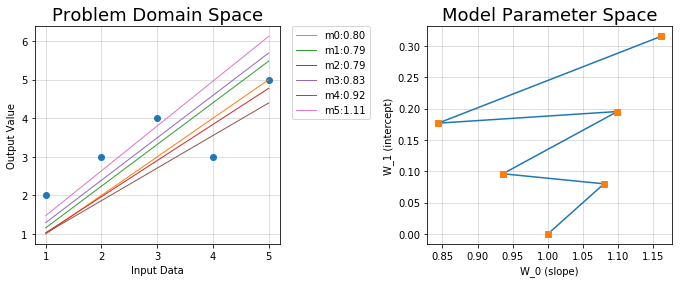

In [19]:
import helperFunc, linRegFunc

#################### Demo Parameters #################### 
# TRY CHANGING THESE & SEE HOW IT AFFECTS OUR SEARCH
N_STEPS = 5
LEARNING_RATE = 0.1
ORIGINAL_MODEL = [1,0]
SHOW_CONTOURS = False

################### Gradient Update Demo #################### 
### Load & Pre-process Data
points = np.genfromtxt("fivePoints.csv", delimiter=',')
X = helperFunc.augment(points)[:,:2]
y = points[:,1]

### Perform GD Update & save intermediate model performance
models, loss = linRegFunc.GDUpdate(X, y, N_STEPS,
                                   ORIGINAL_MODEL, 
                                   LEARNING_RATE, 
                                   verbose = True)

### Display Results
print ("\nSearched %s models..." %(len(models)))
print ("Best model: %s, Loss: %s" % (models[np.argmin(loss)], 
                                    loss[np.argmin(loss)]))
linRegFunc.plotGDProgress(points, models, loss,
                          show_contours = SHOW_CONTOURS)

 > __DISCUSSION QUESTIONS:__  
 * _Look closely at the loss for each model, what problem do you notice?_ 
 * _Use the Model Parameter Space view to explain why this problem might be occurring._ __HINT:__ Try `SHOW_CONTOURS = True`._Based upon your insights, propose a solution to this problem._
 * _When performing GD 'in the wild' will we be able to visualize the error surface (eg. using contour lines, heatmaps or 3D plots)?_

<a id=demo5></a>
## Demo : Stoichastic Gradient Descent
[Return to Contents](#TOC) | [Skip to Appendix](#Appendix)

In Full GD we do a descent step only after the calculation of the gradient over the whole set of data. In this case the gradient is precise and gives the best possible direction. But it can require quite a lot of time if we have huge amounts of data. 

In practice we can get faster convergence if we calculate the gradient not over the whole set of data but over the small (size of $M$) **batch** of it.

\begin{equation}\tag{3.2}
\nabla f(\boldsymbol{\theta}) \approx \nabla_{\text{batch}\,\,} f(\boldsymbol{\theta}) = \frac{2}{m}\sum_{i=1}^{m}\left(\mathbf{x}'_{a_i}\cdot \boldsymbol{\theta} - y_{a_i}\right)\cdot \mathbf{x}'_{a_i}
\end{equation}

where $a_i$ is an array of indices of objects which are in this batch. Common approach here that you should use is to shuffle samples randomly and then iterate over them with batches.

So with this batch approach we get an approximation of the real gradient in point $\boldsymbol{\theta}$. This approximation is very cheap and fast to compute (usually $B$ is not too big $-$ from 32 to 256). After obtaining this gradient we do a descent step in this approximate direction and proceed to the next stage of batch descent.

> __A TASK FOR YOU:__ Perform 5 update steps of Stoichastic Gradient Descent with batchsize = $1$ on our small data set. 
Recall that our initial parameters were:
$$ \boldsymbol{\theta} = \begin{bmatrix} 1 \ \quad 0 \ \end{bmatrix}$$  
> ... and we used a learning rate of $\boldsymbol{\eta} = 0.1$

Hand Calculations:

|  $x_j '$  | $\hat{y}_j$ |   $\boldsymbol{\theta}\cdot\mathbf{x}'_j$ | $\frac{2}{m}\left[ \boldsymbol{\theta}\cdot\mathbf{x}'_j - y_j\right]\cdot\mathbf{x}'_j$ | $\eta \nabla_{\boldsymbol{\theta}} f$ | $\boldsymbol(\theta) - \eta \nabla_{\boldsymbol{\theta}} f $ |
|:----:|:-----:|:----------------:|:------------------------:|:--------------:|:-----------:|
|  input   | true y   |   predicted y   | gradient for this 'batch' | update | new parameters|
| $ \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}$   |  2   |     1 |  -0.4, -0.4 |  -0.04, -0.04 |   1.04, 0.04 |    
| $ \begin{bmatrix} 3 \\ 1 \\ \end{bmatrix}$   |  4   |                  
| $ \begin{bmatrix} 5 \\ 1 \\ \end{bmatrix}$   |  5   |                 
| $ \begin{bmatrix} 4 \\ 1 \\ \end{bmatrix}$   |  3   |                 
| $ \begin{bmatrix} 2 \\ 1 \\ \end{bmatrix}$   |  3   |                 

 > __DISCUSSION QUESTIONS:__  
 * _How does this result compare to our result from the hand calculations in the last section? What implications does this have for our quest to find the optimal paramters?_ 
 * _How will parallelizing Stoichastic Gradient Descent be similar/different to parallelizing regular GD?_ 

In [20]:
w = np.array([1,0])
x = np.array([[1,1],[3,1],[5,1],[4,1],[2,1]])
y = np.array([2,4,5,3,3])

In [21]:
# first x sample, first y sample
print('x:',x[0])
print('y:',y[0])

x: [1 1]
y: 2


In [22]:
# calculate error for first sample
np.dot(w,x[0])-y[0]

-1

In [23]:
# first sample proportional to error (scaled by 2/n where n is number of all samples)
2/5 * (np.dot(w,x[0])-y[0]) * (x[0])

array([-0.4, -0.4])

In [24]:
# multiply by learning rate to calculate first gradient update
.1 * (2/5 * (np.dot(w,x[0])-y[0]) * (x[0]))

array([-0.04, -0.04])

In [25]:
# subtract gradient update from prior weights to calculate new weights
w = w - .1 * (2/5 * (np.dot(w,x[0])-y[0]) * (x[0]))
w

array([1.04, 0.04])

In [26]:
# second x sample, second y sample
print('x:',x[1])
print('y:',y[1])

x: [3 1]
y: 4


In [27]:
# calculate error for second sample
np.dot(w,x[1])-y[1]

-0.8399999999999999

In [28]:
# secpmd sample proportional to error (scaled by 2/n where n is number of all samples)
2/5 * (np.dot(w,x[1])-y[1]) * (x[1])

array([-1.008, -0.336])

In [29]:
# multiply by learning rate to calculate second gradient update
.1 * 2/5 * (np.dot(w,x[1])-y[1]) * (x[1])

array([-0.1008, -0.0336])

In [30]:
# subtract gradient update from prior weights to calculate new weights
w = w - .1 * 2/5 * (np.dot(w,x[1])-y[1]) * (x[1])
w

array([1.1408, 0.0736])

In [31]:
np.round(w,2)

array([1.14, 0.07])

Model 0: [1.00, 0.00]
Loss: 0.8
     >>> gradient: [-0.4 -0.4]
     >>> update: [-0.04 -0.04]
Model 1: [1.04, 0.04]
Loss: 0.7648
     >>> gradient: [-1.008 -0.336]
     >>> update: [-0.1008 -0.0336]
Model 2: [1.14, 0.07]
Loss: 0.9141452800000004
     >>> gradient: [1.5552  0.31104]
     >>> update: [0.15552  0.031104]
Model 3: [0.99, 0.04]
Loss: 0.7782153256960003
     >>> gradient: [1.5737856 0.3934464]
     >>> update: [0.15737856 0.03934464]
Model 4: [0.83, 0.00]
Loss: 1.2577106818564097
     >>> gradient: [-1.07283661 -0.5364183 ]
     >>> update: [-0.10728366 -0.05364183]
Model 5: [0.94, 0.06]
Loss: 0.8337672467910437

Searched 6 models...
Best model: [1.04 0.04], Loss: 0.7648


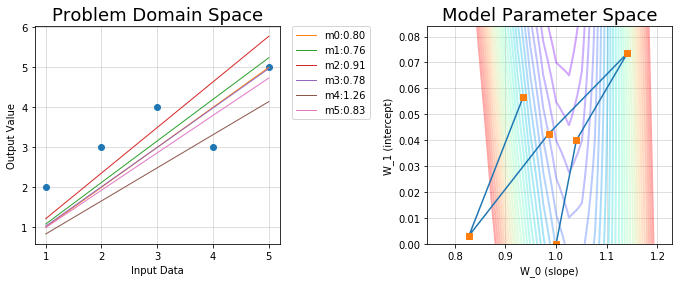

In [32]:
import helperFunc, linRegFunc

#################### Demo Parameters #################### 
# TRY CHANGING THESE & SEE HOW IT AFFECTS OUR SEARCH
N_STEPS = 5
BATCHSIZE = 1
LEARNING_RATE = 0.1
ORIGINAL_MODEL = [1,0]
SHOW_CONTOURS = True

################### Stoichastic GD Demo #################### 
### Load & Pre-process Data
points = np.genfromtxt("fivePoints.csv", delimiter=',')
X = helperFunc.augment(points)[:,:2]
y = points[:,1]

### Perform SGD Updates & save intermediate model performance
models, loss = linRegFunc.SGDUpdate(X, y, N_STEPS,
                                    BATCHSIZE,
                                    ORIGINAL_MODEL, 
                                    LEARNING_RATE, 
                                    verbose = True)

### Display Results
print ("\nSearched %s models..." %(len(models)))
print ("Best model: %s, Loss: %s" % (models[np.argmin(loss)], 
                                    loss[np.argmin(loss)]))
linRegFunc.plotGDProgress(points, models, loss,
                          show_contours = SHOW_CONTOURS)

> __DISCUSSION QUESTIONS:__ 
* _At first glance does this seem to work as well as regular gradient descent? Why might our initial impression be deceiving?_ 
* _Does adjusting the batchsize and/or learning rate fix the problem that we're seeing?_
* _What do you notice about the direction of the first 3 updates? From the perspective of the first three points, what should our line look like?_
* _How does the scale of our data can impact the direction of our updates & time to convergence?_

# Understanding the scikit-learn estimator API

Scikit-learn, the open source Python library, implements a wide variety of machine learning, preprocessing, cross-validation and visualization algorithms with the help of a unified interface. If you're still quite new to the field, you should be aware that machine learning, and thus also this Python library, belong to the must-knows for every aspiring data scientist.


The following scikit-learn cheat sheet from DataCamp is useful for those of you who have already started learning about the Python package, but that still want a handy reference sheet. Or, if you still have no idea about how scikit-learn works, this machine learning cheat sheet might come in handy to get a quick first idea of the basics that you need to know to get started.

Either way, we're sure that you're going to find it useful when you're tackling machine learning problems!

This scikit-learn cheat sheet will introduce you to the basic steps that you need to go through to implement machine learning algorithms successfully: 

* you'll see how to load in your data, 
* how to preprocess it, 
* how to create your own model to which you can fit your data and predict target labels, 
* how to validate your model 
* and how to tune it further to improve its performance.

 

In short, this cheat sheet will kickstart your data science projects: with the help of code examples, you'll have created, validated and tuned your machine learning models in no time.


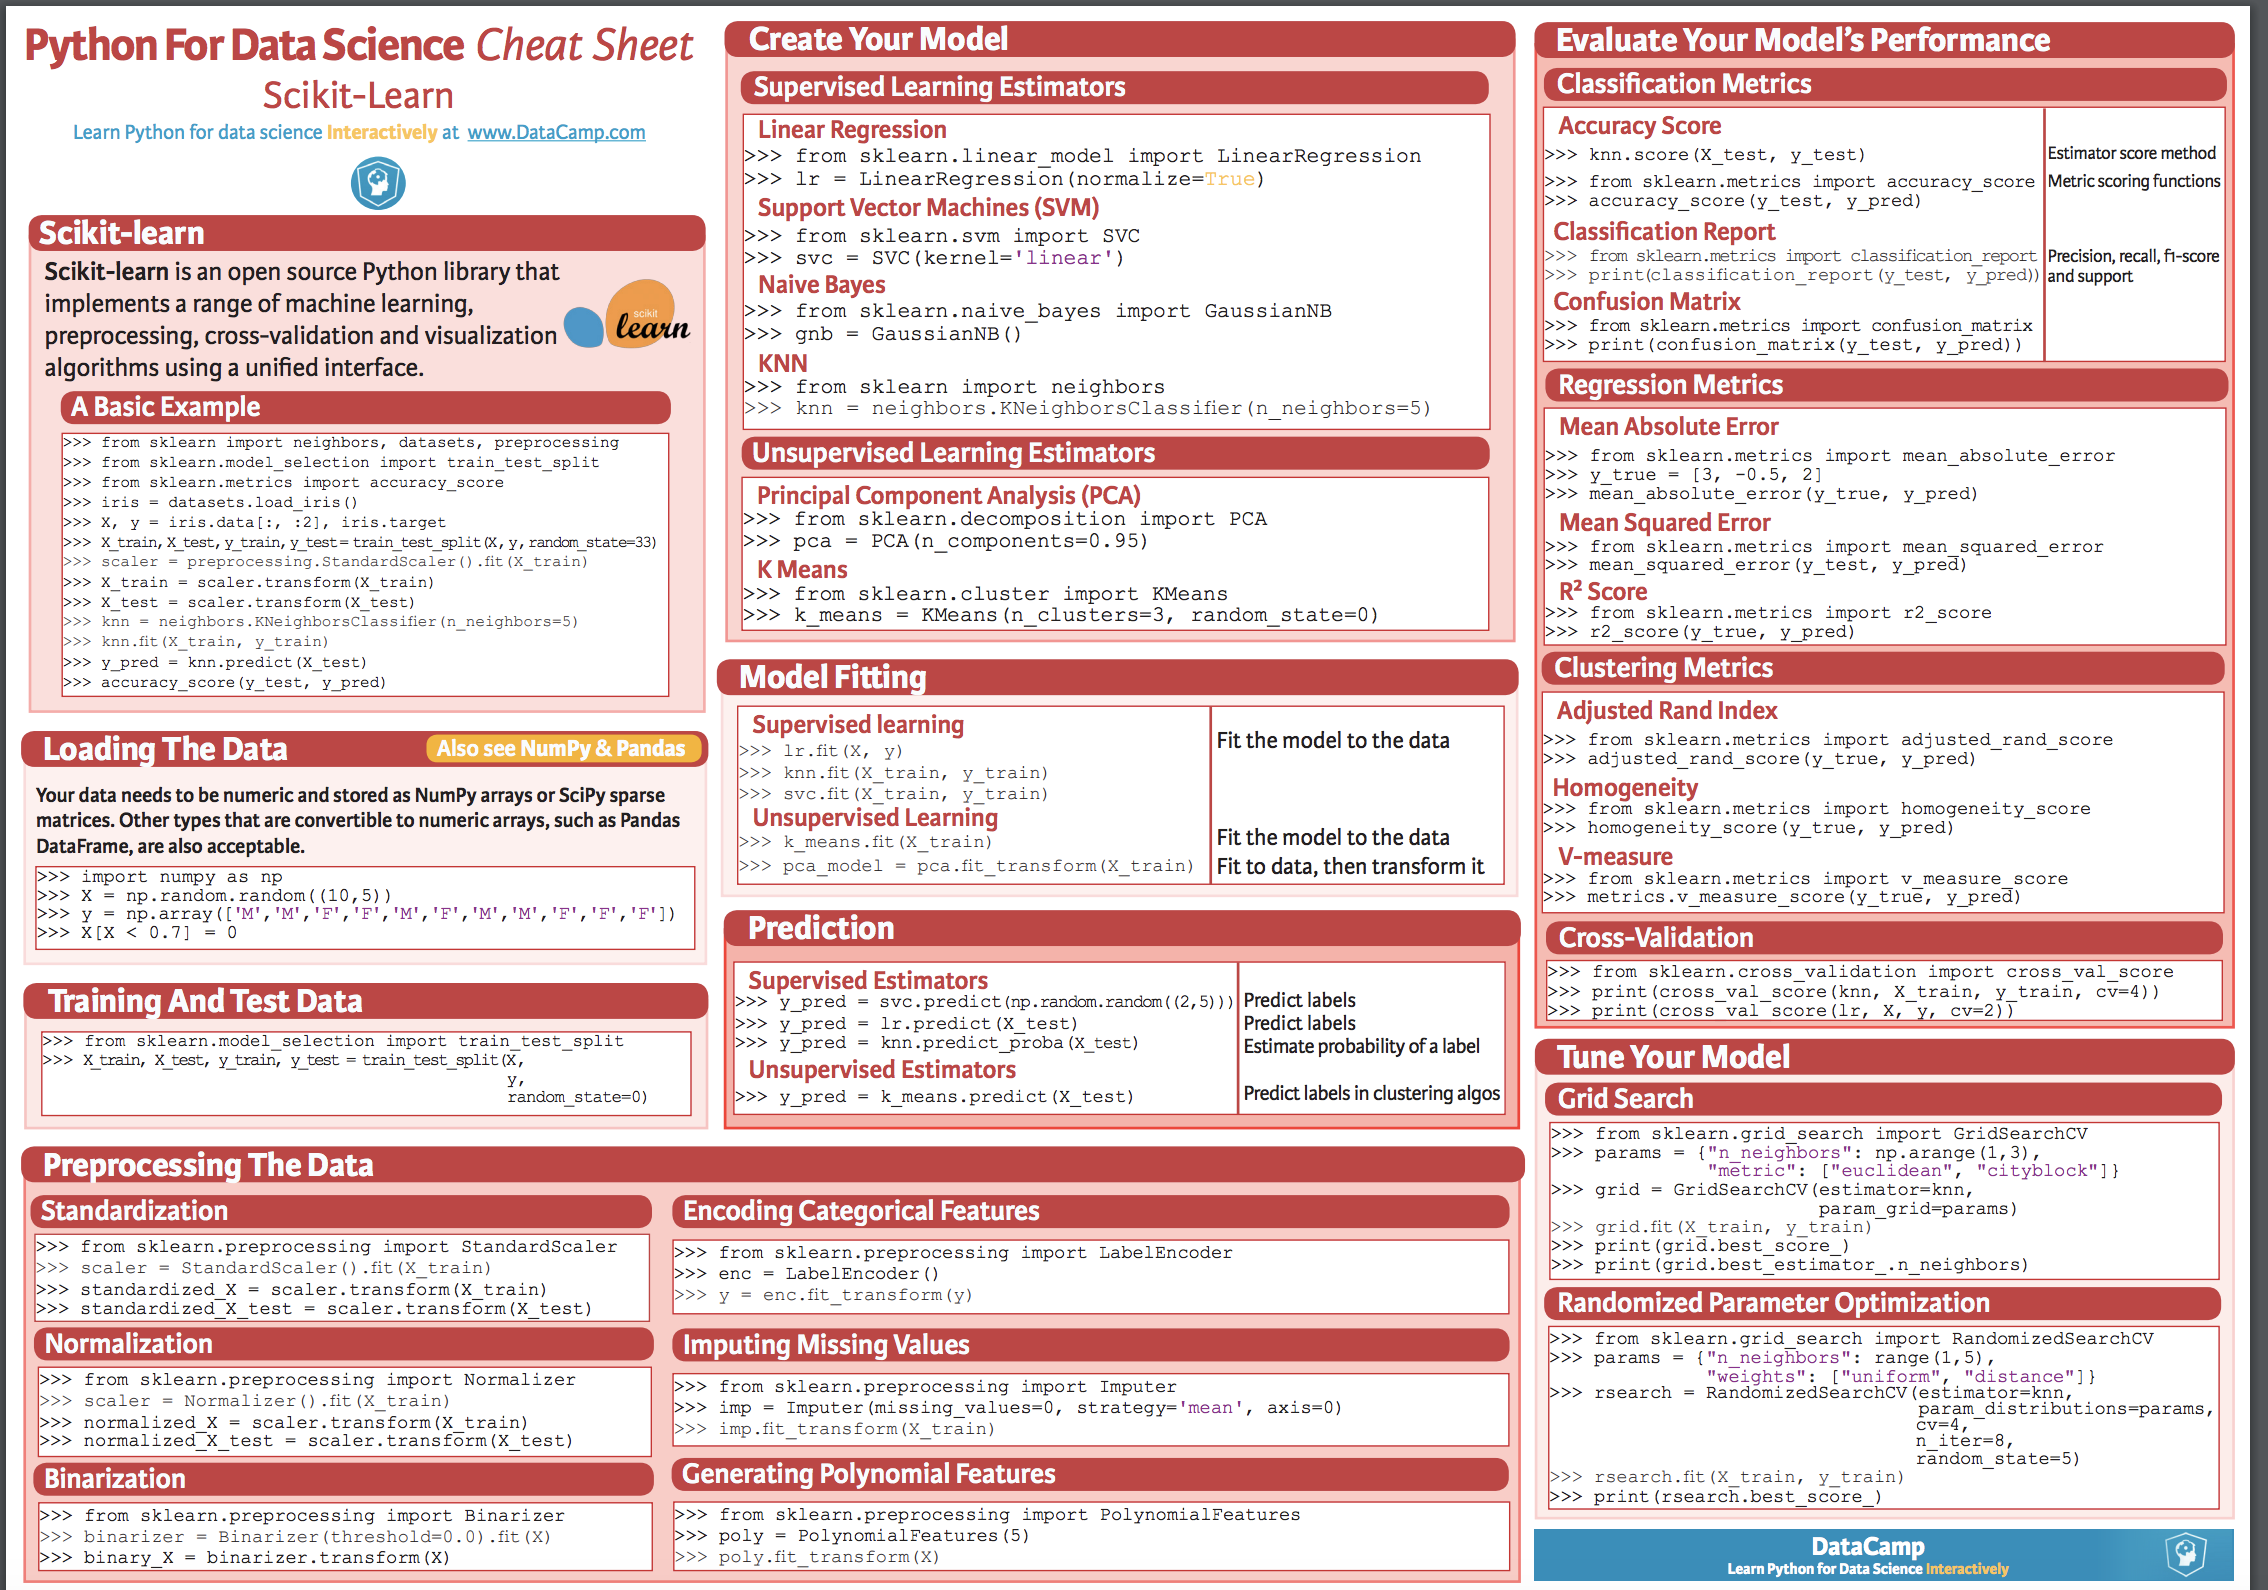

In [ ]:
#<img src="attachment:image.png" alt="Drawing" style="width: =400px;"/>

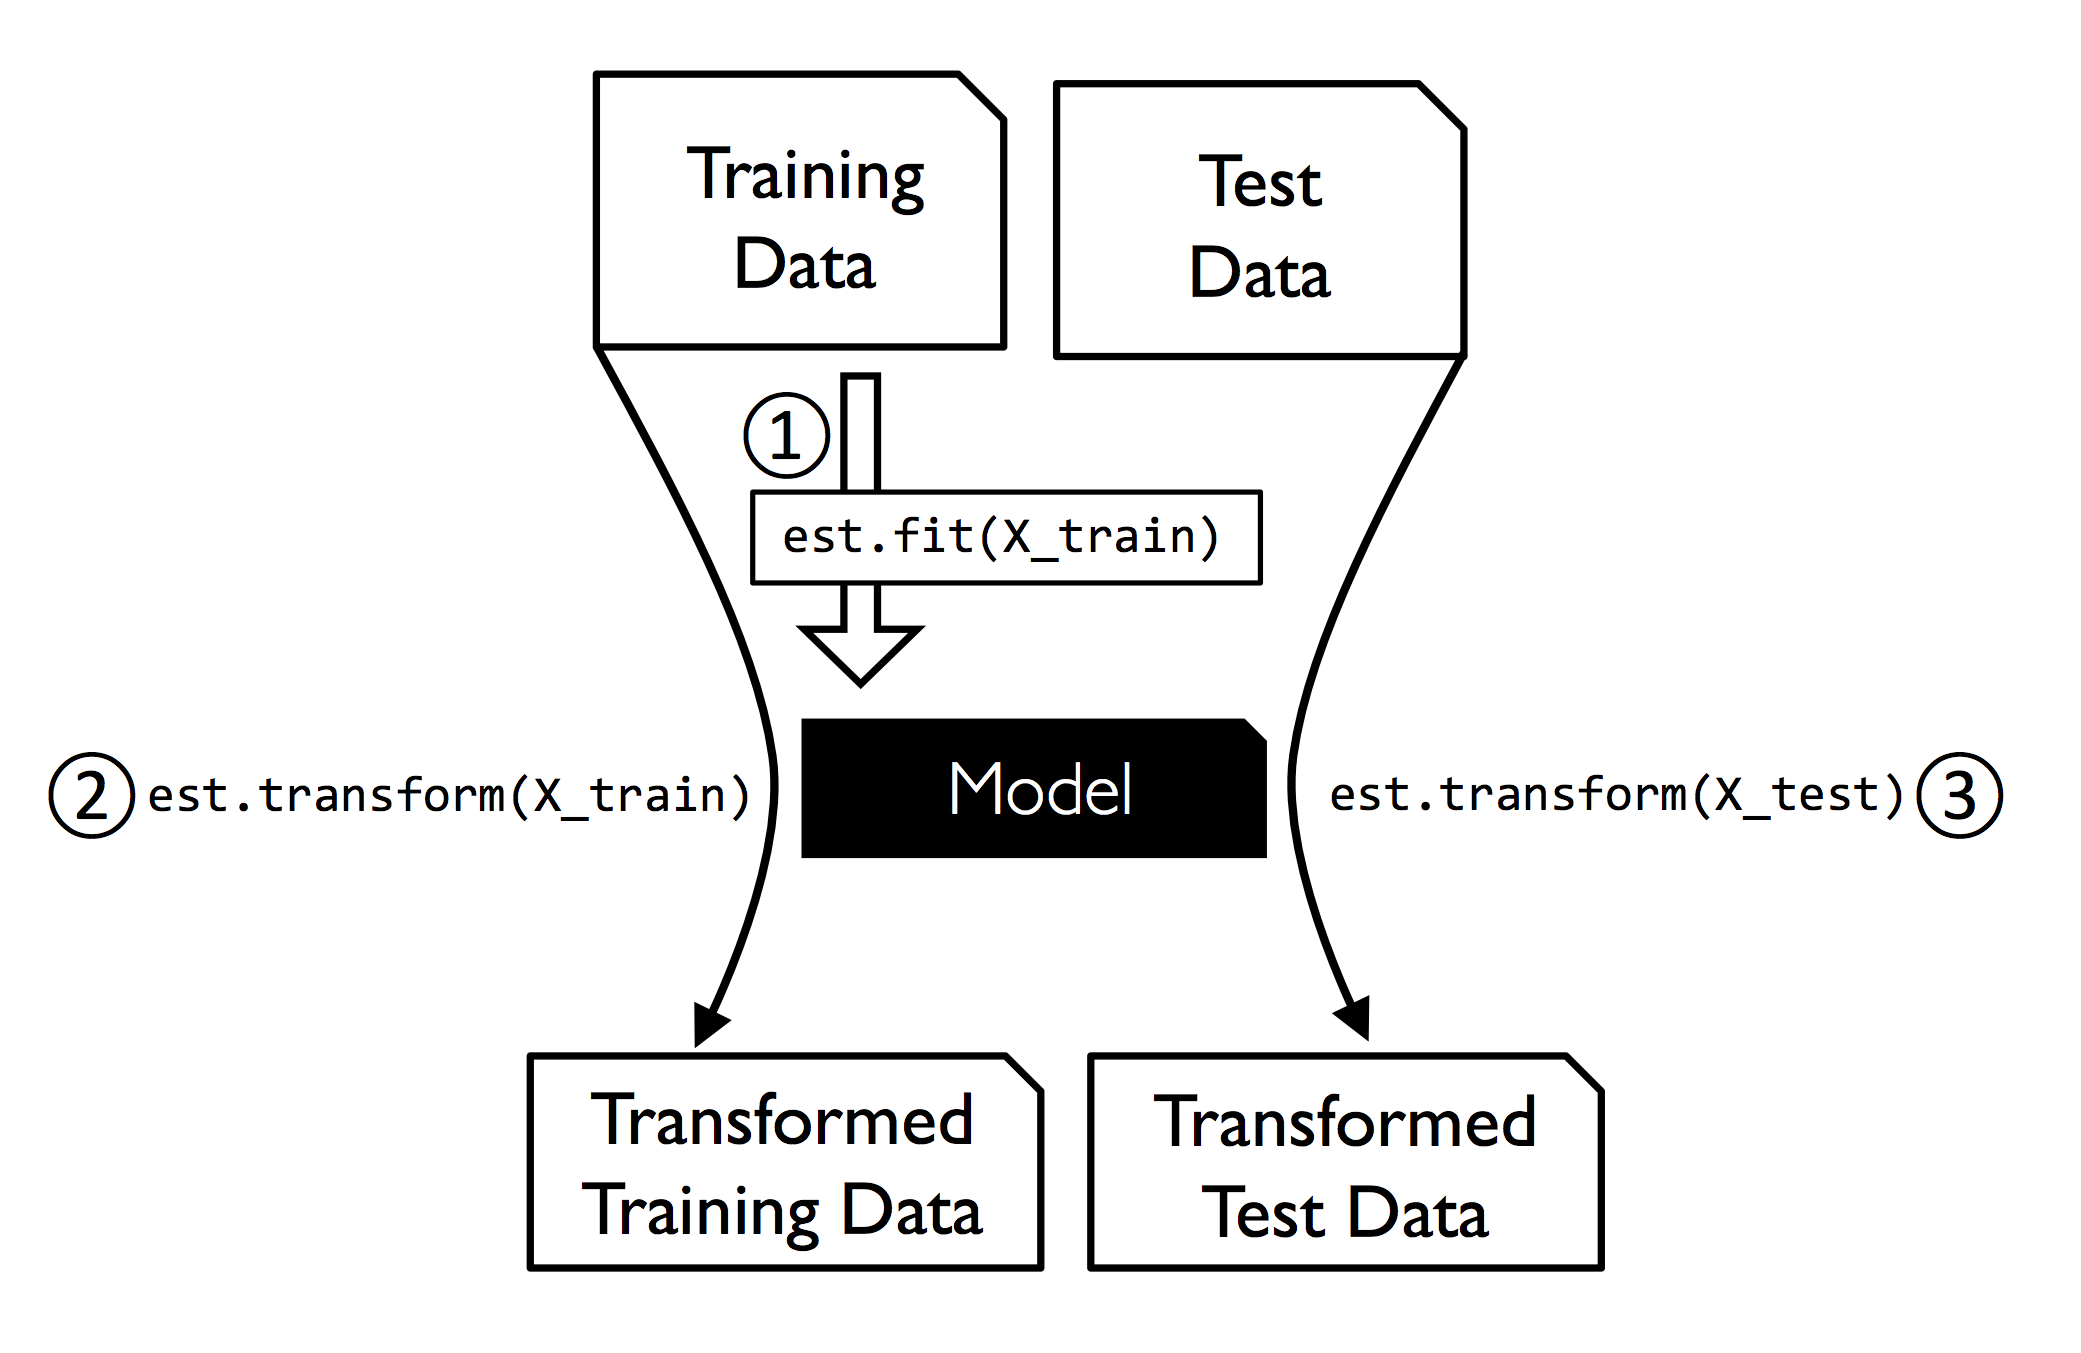

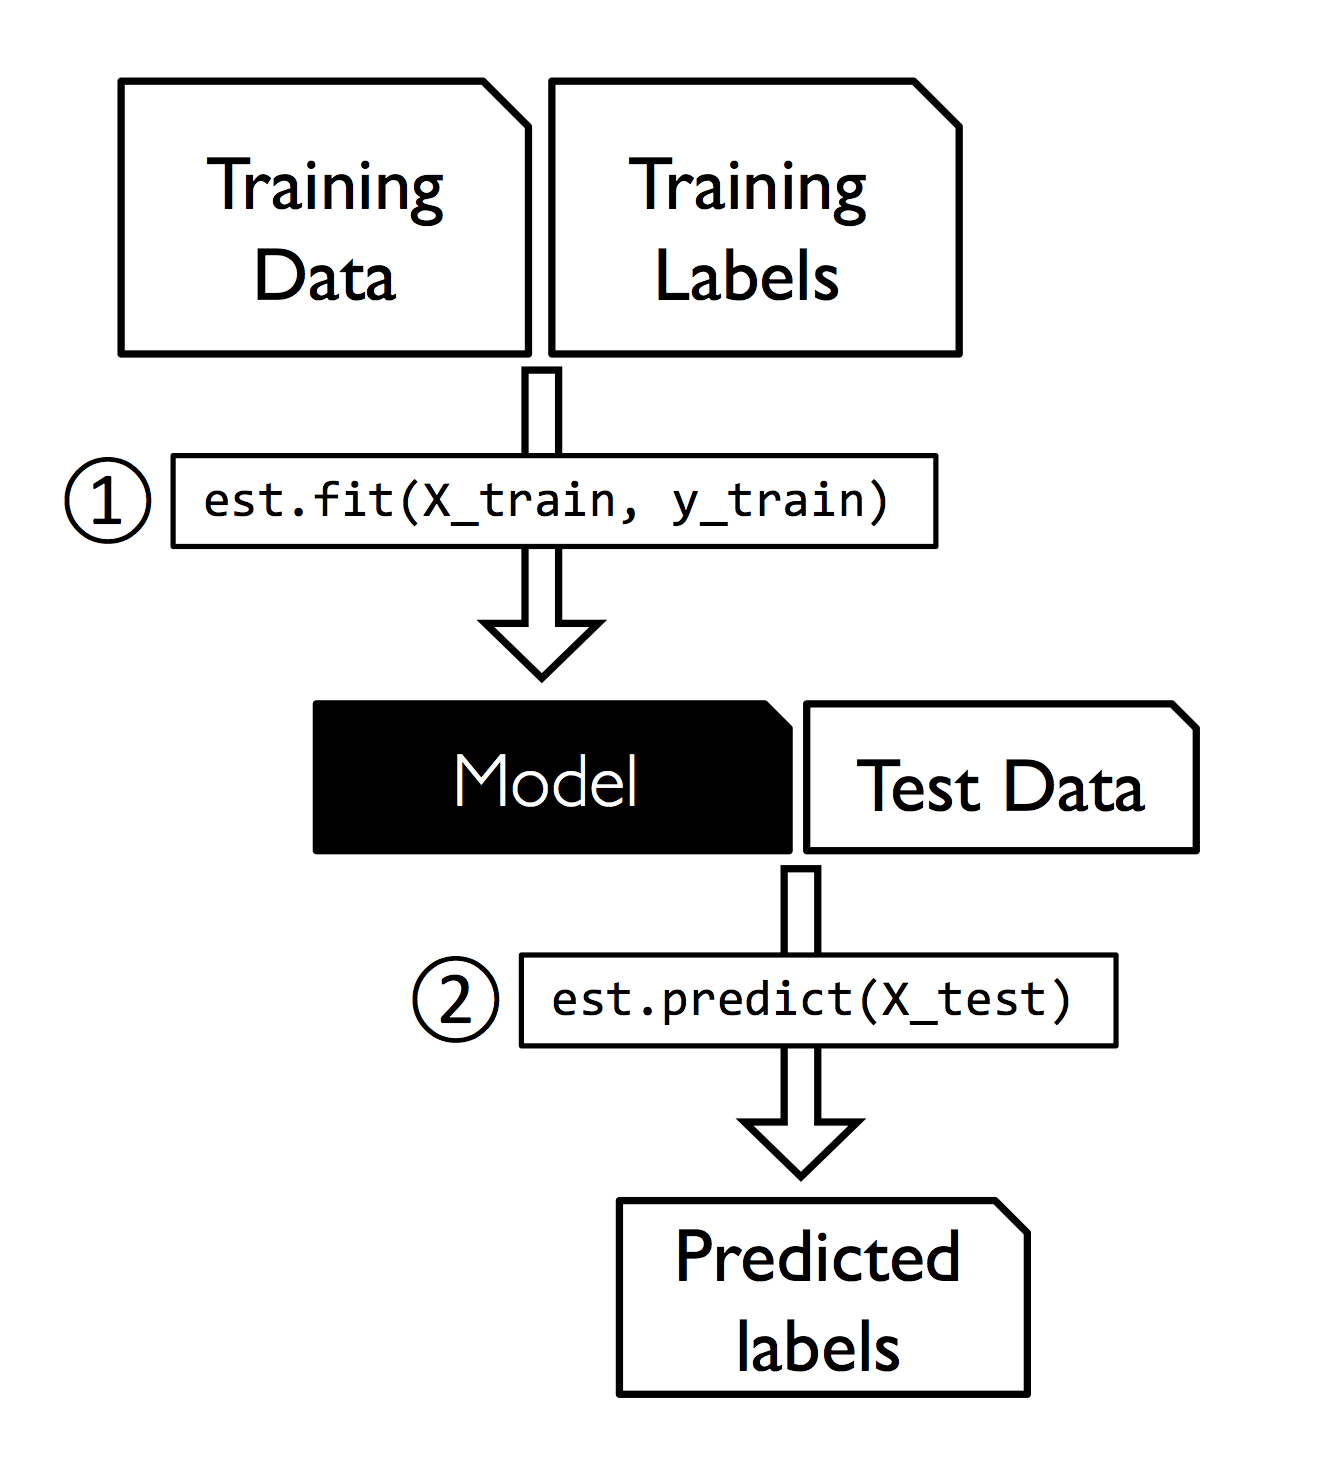

<br>
<br>

# Feature selection

This section serves as a brief introduction to feature selection. This will be covered more completely over the next few lectures (e.g., Unit-05 introduces regularization as a means to accomplishing feature selection when doing LASSO regression). 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance).


The central premise when using a feature selection technique is that the data contains many features that are either redundant or irrelevant, and can thus be removed without incurring much loss of information. Redundant or irrelevant features are two distinct notions, since one relevant feature may be redundant in the presence of another relevant feature with which it is strongly correlated.

Feature selection techniques should be distinguished from feature extraction. Feature extraction creates new features from functions of the original features, whereas feature selection returns a subset of the features. Feature selection techniques are often used in domains where there are many features and comparatively few samples (or data points). Archetypal cases for the application of feature selection include the analysis of written texts and DNA microarray data, where there are many thousands of features, and a few tens to hundreds of samples.

## feature selection algorithm
A feature selection algorithm can be seen as the combination of a search technique for proposing new feature subsets, along with an evaluation measure which scores the different feature subsets. The simplest algorithm is to test each possible subset of features finding the one which minimizes the error rate. This is an exhaustive search of the space, and is computationally intractable for all but the smallest of feature sets. The choice of evaluation metric heavily influences the algorithm, and it is these evaluation metrics which distinguish between the three main categories of feature selection algorithms: wrappers, filters and embedded methods.

## sklearn.feature_selection.SelectKBest

Select features according to the k highest scores. It takes as a parameter a score function, which must be applicable to a pair (X, y). The score function must return an array of scores, one for each feature X[:,i] of X (additionally, it can also return p-values, but these are neither needed nor required). SelectKBest then simply retains the first k features of X with the highest scores.

So, for example, if you pass chi2 as a score function, SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels). A small value will mean the feature is independent of y. A large value will mean the feature is non-randomly related to y, and so likely to provide important information. Only k features will be retained.


b = fs.SelectKBest(fs.f_regression, k=1) #k is number of features.
X_train = b.fit_transform(X_train, y_train)


For more details on click here[SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)


For more details see[here](https://en.wikipedia.org/wiki/Feature_selection)

For more elaborate explanation see [this case study ](#https://medium.com/@dhwajraj/learning-python-regression-analysis-part-9-tests-and-validity-for-regression-models-78dcd5cde3a1
)

## Variable importance based p-value for each variable

In [33]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Features labels
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
df = pd.DataFrame(X_train, columns=boston.feature_names)
df["MEDV"] = y_train
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #SKLearn's linear regression

# now build a linear regression model using statsmodels library
lm= sm.ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data =df).fit()
Y_ols_pred=lm.predict(X_test) #make predictions
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          6.22e-109
Time:                        21:42:22   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2889      5.678      5.335      0.000      19.126      41.452
CRIM          -0.1125      0.035     -3.250      0.001      -0.181      -0.044
ZN             0.0301      0.016      1.881      0.061      -0.001       0.062
INDUS          0.0407      0.067      0.605      0.546      -0.092       0.173
CHAS           2.7868      0.956      2.916      0.004       0.908       4.666
NOX          -17.2406      4.237     -4.069      0.000     -25.571      -8.911
RM             4.4325      0.464      9.551      0.000       3.520       5.345
AGE           -0.0062      0.015     -0.428      0.669      -0.035       0.022
DIS           -1.4485      0.226     -6.410      0.000      -1.893      -1.004
RAD            0.2621      0.076      3.451      0.001       0.113       0.411
TAX           -0.0106      0.004     -2.506      0.013      -0.019      -0.002
PTRATIO       -0.9164      0.144     -6.364      0.000      -1.200      -0.633
B              0.0125      0.003      4.203      0.000       0.007       0.018
LSTAT         -0.5093      0.056     -9.151      0.000      -0.619      -0.400
==============================================================================
Omnibus:                      133.030   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.504
Skew:                           1.379   Prob(JB):                    2.40e-126
Kurtosis:                       8.173   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## SelectKBest for linear regression

`sklearn.feature_selection.f_regression(X, y, center=True)` 



SelectKBest for linear regression uses a univariate linear regression tests call f_regression. f_regression is a scoring function to be used in a feature seletion procedure, not a free standing feature selection procedure.

This evaluation procedure is a two step process.

1. STEP 1: For each input variable, aka regressor, compute correlation between the  regressor in question and the target is computed, that is, 
   * ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
  
   * The most familiar measure of dependence between two quantities is the Pearson product-moment correlation coefficient, or "Pearson's correlation coefficient", commonly called simply "the correlation coefficient". It is obtained by dividing the covariance of the two variables by the product of their standard deviations. Karl Pearson developed the coefficient from a similar but slightly different idea by Francis Galton.[4]

   * The population correlation coefficient ρX,Y between two random variables X and Y with expected values μX and μY and standard deviations σX and σY is defined as

$${\displaystyle \rho _{X,Y}=\mathrm {corr} (X,Y)={\mathrm {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={E[(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}},} $$

    * where $E$ is the expected value operator, cov means covariance, and corr is a widely used alternative notation for the correlation coefficient.
2. STEP 2: It is converted to an F score then to a p-value.


Here is a snippet of the SKLearn source [code](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/feature_selection/univariate_selection.py#L230) that computes this:

```   
    # compute the correlation
    corr = safe_sparse_dot(y, X)
    corr /= X_norms
    corr /= np.linalg.norm(y)

    # convert to p-value
    degrees_of_freedom = y.size - (2 if center else 1)
    F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
    pv = stats.f.sf(F, 1, degrees_of_freedom)   #Get the p-values. If p-value < 0.05 then keep feature!
    return F, pv
```

For more details on SelectKBest see [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)
For more details on f_regression see [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)

See the SKLearn  source code for `sklearn.feature_selection.f_regression` [here](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/feature_selection/univariate_selection.py#L230)



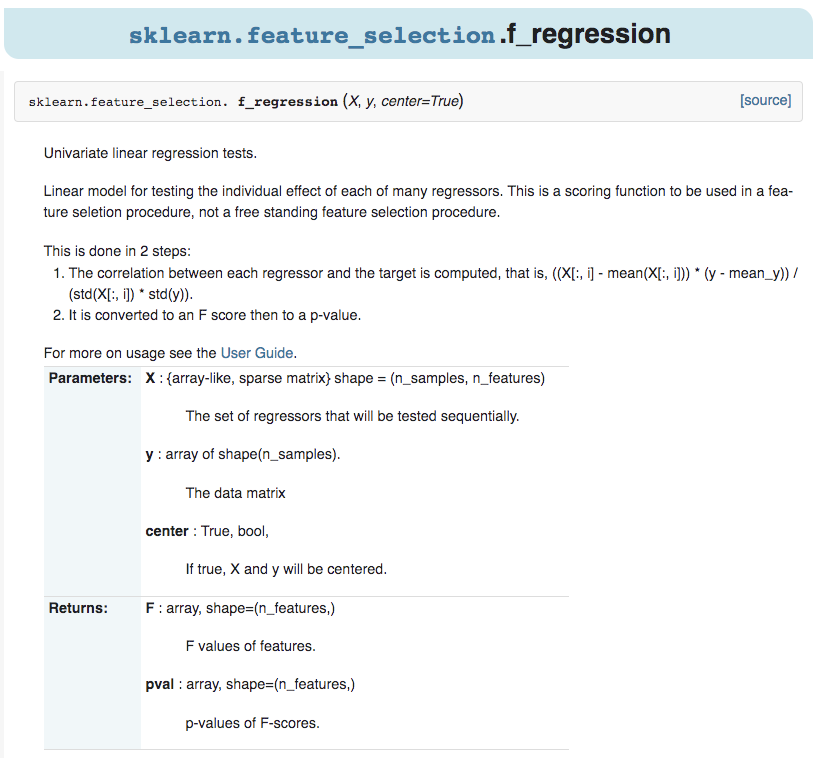

### Example of SelectKBest  in action (less transparent)
This is an example of SelectKBest in action. It both fits and transforms the data on one step. 

```
best = SelectKBest(f_regression, k=5) #k is number of features.
X_train_sel = best.fit_transform(X_train, y_train)
```

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_boston
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = pd.DataFrame(X_train, columns=boston.feature_names)
df["MEDV"] = y_train
best = SelectKBest(f_regression, k=5) #k is number of features.
X_train_sel = best.fit_transform(X_train, y_train)
X_train_sel[0:4,:]

array([[ 18.1  ,   5.304, 666.   ,  20.2  ,  24.91 ],
       [  8.14 ,   5.834, 307.   ,  21.   ,   8.47 ],
       [  6.06 ,   6.031, 304.   ,  16.9  ,   7.83 ],
       [ 18.1  ,   6.103, 666.   ,  20.2  ,  23.29 ]])

In [37]:
best.pvalues_

array([4.27976845e-15, 2.03782449e-10, 1.19094157e-23, 1.15540575e-04,
       2.56313418e-18, 2.24321025e-63, 2.09805519e-12, 1.76842089e-06,
       6.38597383e-16, 1.58503068e-22, 6.31725885e-26, 2.19901681e-12,
       3.19774395e-70])

In [38]:
X_train.head()  #INDUS, RM, TAX, PTRATIO, LSAT

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


### Example of SelectKBest  in action (very transparent)
This is an example of SelectKBest in action.  


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# SCORE  linear regression input variables using correlation producing F scores and corresponding p-values
# K is used select top k rated input features
def select_kbest_reg(data_frame, target, k=5):
    """
    Selecting K-Best features regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = pd.DataFrame(X_train, columns=boston.feature_names).copy()
df["MEDV"] = y_train

per_feat = select_kbest_reg(df, 'MEDV', k=7)
per_feat_sorted = per_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
top_k_feature_indices = per_feat_sorted['Attribute'].values.flatten()
print("\n Feature Score for a linear regression using correlation\n")
print(per_feat_sorted)   ##INDUS, RM, TAX, PTRATIO, LSAT

print(np.linalg.norm(y_train))


 Feature Score for a linear regression using correlation

       F Score       P Value  Support Attribute
12  476.339250  3.197744e-70     True     LSTAT
5   410.229239  2.243210e-63     True        RM
10  127.844779  6.317259e-26     True   PTRATIO
2   114.320536  1.190942e-23     True     INDUS
9   107.771409  1.585031e-22     True       TAX
4    84.013811  2.563134e-18     True       NOX
8    71.013850  6.385974e-16     True       RAD
0    66.619655  4.279768e-15    False      CRIM
6    52.621081  2.098055e-12    False       AGE
11   52.516697  2.199017e-12    False         B
1    42.588205  2.037824e-10    False        ZN
7    23.522254  1.768421e-06    False       DIS
3    15.161468  1.155406e-04    False      CHAS
495.02361559828637


** The top 7 features are follows in descreasing order of F Score:** 

```F Score       P Value  Support Attribute
12  476.339250  3.197744e-70     True     LSTAT
5   410.229239  2.243210e-63     True        RM
10  127.844779  6.317259e-26     True   PTRATIO
2   114.320536  1.190942e-23     True     INDUS
9   107.771409  1.585031e-22     True       TAX
4    84.013811  2.563134e-18     True       NOX
8    71.013850  6.385974e-16     True       RAD
```

#### Plot Input variable importance 
Here we use the SelectKBest procedure to score the importance of  each
attribute for making accurate predictions.

In [40]:
feature_importances = per_feat[["F Score", "Attribute"]] #Order of appearence in dataframe
feature_importances_sorted = per_feat_sorted[["F Score", "Attribute"]] #Order of appearence in dataframe
feature_importances

,F Score,Attribute
0,66.619655,CRIM
1,42.588205,ZN
2,114.320536,INDUS
3,15.161468,CHAS
4,84.013811,NOX
5,410.229239,RM
6,52.621081,AGE
7,23.522254,DIS
8,71.013850,RAD
9,107.771409,TAX


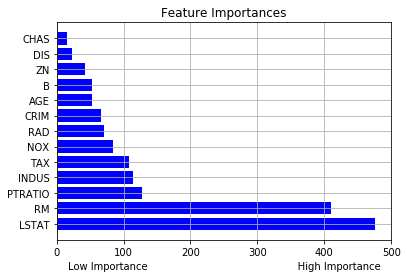

In [41]:
# Plot the feature importances of the forest
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure() 
plt.title("Feature importances")
sortedNames = np.array(feature_importances_sorted)[:, 1]
sortedImportances = np.array(feature_importances_sorted)[:, 0]

plt.title('Feature Importances')
plt.barh(range(len(sortedNames)), sortedImportances, color='b', align='center')
plt.yticks(range(len(sortedNames)), sortedNames)
plt.xlabel('Low Importance                                                High Importance')
plt.grid()
plt.show()

## Feature Selection step within  a pipeline 

Here we add a transformer to the preparation pipeline to select only the most important attributes.

We need to follow the SKLearn protocol/API in this implementation. Dont about the details too much.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

# find the indices to the top ranking input features based on importance 
#    arr is an array of feature importances in order of the input data matrix X
#    k is the number of features to be selected
#
# Note: this feature selector assumes that you have already computed the feature importances 
# somehow (for example using SelectKBest or through a RandomForestRegressor decision tree ensemble). 
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    # select the columns of data matrix of the selected input features 
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using `SelectKBest` or through a  `RandomForestRegressor` decision tree ensemble). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

In [44]:
#A closer look at TopFeatureSelector
k=7
featureScores = feature_importances[["F Score"]].values.flatten()
tf = TopFeatureSelector(featureScores, k)
tf.fit(X_train)
print(tf.feature_indices_)
#X_train[:,tf.feature_indices_]
X_train.values[:,tf.feature_indices_]
#X_train.info
#type(X)

[ 2  4  5  8  9 10 12]


array([[1.810e+01, 6.140e-01, 5.304e+00, ..., 6.660e+02, 2.020e+01,
        2.491e+01],
       [8.140e+00, 5.380e-01, 5.834e+00, ..., 3.070e+02, 2.100e+01,
        8.470e+00],
       [6.060e+00, 4.379e-01, 6.031e+00, ..., 3.040e+02, 1.690e+01,
        7.830e+00],
       ...,
       [2.010e+00, 4.350e-01, 6.635e+00, ..., 2.800e+02, 1.700e+01,
        5.990e+00],
       [1.810e+01, 7.400e-01, 6.629e+00, ..., 6.660e+02, 2.020e+01,
        2.327e+01],
       [8.560e+00, 5.200e-01, 6.405e+00, ..., 3.840e+02, 2.090e+01,
        1.063e+01]])

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
featureScores = feature_importances[["F Score"]].values.flatten()
k=7
preparation_and_feature_selection_pipeline = Pipeline([
    #('preparation', ......stand),
    ("std_scaler", StandardScaler()),
    ('feature_selection', TopFeatureSelector(featureScores, k)) 
]) 
    
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(X_train.values)

Let's look at the features of the first 3 instances:

In [46]:
housing_prepared_top_k_features[0:3]

array([[ 1.03323679,  0.48925206, -1.42806858,  1.70689143,  1.57843444,
         0.84534281,  1.75350503],
       [-0.41315956, -0.15723342, -0.68008655, -0.62435988, -0.58464788,
         1.20474139, -0.5614742 ],
       [-0.71521823, -1.00872286, -0.40206304, -0.97404758, -0.60272378,
        -0.63717631, -0.65159505]])

Now let's double check that these are indeed the top k features:

In [47]:
X_train.values[0:3, tf.feature_indices_]   # What happened? HINT standardization

array([[1.810e+01, 6.140e-01, 5.304e+00, 2.400e+01, 6.660e+02, 2.020e+01,
        2.491e+01],
       [8.140e+00, 5.380e-01, 5.834e+00, 4.000e+00, 3.070e+02, 2.100e+01,
        8.470e+00],
       [6.060e+00, 4.379e-01, 6.031e+00, 1.000e+00, 3.040e+02, 1.690e+01,
        7.830e+00]])

Works great!  :)

##  Full pipeline for data prep, feature selection and modeling

Compare against the actual values:

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#('preparation', ......stand),
#SKLearn's linear regression pipeline
featureScores = feature_importances[["F Score"]].values.flatten()
preparation_and_feature_selection_pipeline = Pipeline([
        ("std_scaler", StandardScaler()),
        ('feature_selection', TopFeatureSelector(featureScores, k)),
        ('lineReg', LinearRegression())
    ])
#print(preparation_and_feature_selection_pipeline)
preparation_and_feature_selection_pipeline.fit(X_train.values, y_train) 


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_selection', TopFeatureSelector(feature_importances=array([ 66.61966,  42.58821, 114.32054,  15.16147,  84.01381, 410.22924,
        52.62108,  23.52225,  71.01385, 107.77141, 127.84478,  52.5167 ,
       476.33925]),
          k=7)), ('lineReg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Make some predictions on the test data

In [49]:
# let's try the full pipeline on a few testing instances
some_data = X_test.iloc[:5]
some_labels = y_test[:5]
predictions = preparation_and_feature_selection_pipeline.predict(some_data)

print("Predictions:", predictions)

Predictions: [26.48174487 31.34930429 13.67279494 25.53112484 18.02437232]


In [50]:
some_labels


array([23.6, 32.4, 13.6, 22.8, 16.1])

### Plot coeffients of the learnt linear regression model

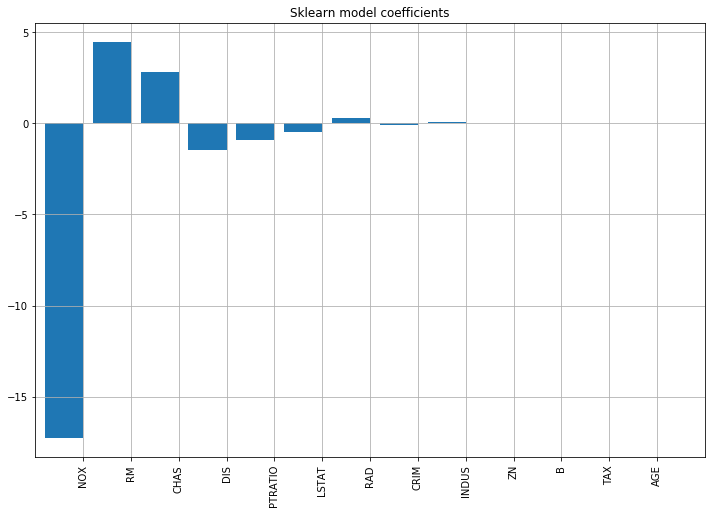

In [51]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

feat_scores = pd.DataFrame()
feat_scores["coefficient"] = model_sk.coef_
feat_scores["ABScoefficient"] = np.abs(model_sk.coef_)
feat_scores["Attribute"] = X.columns
feat_scores = feat_scores.sort_values(["ABScoefficient"], ascending=[False])
feat_scores

plt.figure(figsize=(12, 8))
plt.bar(np.arange(model_sk.coef_.shape[0]) - 0.4, feat_scores["coefficient"] )
plt.xticks(np.arange(model_sk.coef_.shape[0]), feat_scores["Attribute"], rotation='vertical')
plt.xlim([-1, model_sk.coef_.shape[0]])
plt.grid()
plt.title("Sklearn model coefficients");


# Dealing with missing data

For real valued variables with missing data, one can deal with missing data in a variety of ways:

* Delete records with missing values [this is possible but extreme; try to avoid if possible]
* Fill in missing values with, say, the mean of that feature 

Other possible strategies for processing missing data (not discussed further here) include:

* Predict the missing value using, say, a linear regression model that is trained on the data examples that dont have any missing values 
* Use a secondary discrete variable as follows: use a SQL Group By statement to get a representative value for each discrete value of this secondary variable. E.g.,  use  zip code as the secondary variable to fill in missing data for the real-valued feature of, say, salary.
* Sometimes it does not make sense to fill in missing values. E.g., the fifth word slot in a search engine query when the query is just a single word. 

## Identifying missing values in tabular data

In [52]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [53]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [54]:
# access the underlying NumPy array
# via the `values` attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

<br>
<br>

## Strategy 1: Eliminating samples or features with missing values

In [55]:
# remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [56]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [57]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [58]:
# only drop rows where all columns are NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [59]:
# drop rows that have less than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [60]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


<br>
<br>

## Strategy 2: Imputing missing values

In [61]:
# again: our original array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [62]:
# impute missing values via the column mean

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

<br>
<br>

# Handling categorical input data

## Nominal and ordinal features

In [63]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


<br>
<br>

## Mapping ordinal features

In [64]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [65]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<br>
<br>

## Encoding class labels

In [66]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [67]:
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [68]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [69]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [73]:
# reverse mapping
class_le.inverse_transform(y)

/Users/jamie/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

<br>
<br>

## Performing one-hot encoding on nominal features

In [74]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [75]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [76]:
# return dense array so that we can skip
# the toarray step

ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [77]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


### multicollinearity guard in get_dummies
When we are using one-hot encoding datasets, we have to keep in mind that it
introduces multicollinearity, which can be an issue for certain methods (for instance,
methods that require matrix inversion). If features are highly correlated, matrices are
computationally difficult to invert, which can lead to numerically unstable estimates.
To reduce the correlation among variables, we can simply remove one feature
column from the one-hot encoded array. Note that we do not lose any important
information by removing a feature column, though; for example, if we remove the
column color_blue, the feature information is still preserved since if we observe
color_green=0 and color_red=0, it implies that the observation must be blue.

In [78]:
# multicollinearity guard in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [79]:
# multicollinearity guard for the OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

<br>
<br>

# Partitioning a dataset into a seperate training and test set

In [80]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [81]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

<br>
<br>

# Standardizing data: Bringing features onto the same scale

In [82]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [83]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

A visual example:

In [84]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


<br>
<br>

<a id=Appendix></a>
# Appendix: Supporting Code.


This section of the notebook contains the code for the supporting files referenced throughout this notebook. These include:  
* `helperFunc.py` - _functions to create, plot, and transform data_
* `linRegFunc.py` - _functions to run Linear Regression via gradient descent._  

__WARNING: running the cells below will recreate each file and overwrite any existing file of the same name.__

### `helperFunc.py`

In [85]:
%%writefile helperFunc.py
#!/opt/anaconda/bin/python2.7
"""
This file contains helper functions for generating, transforming
and plotting 2 dimensional data to use in testing & for ML demos.

Avaliable functions include:
    augment(X)
    plot2DModels(data, models=[], names = [], title=None)
    plotErrorSurface(data, weight_grid, loss, title=None)

"""
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def augment(X):
    """
    Takes an np.array whose rows are data points and augments each
    each row with a 1 in the last position to represent the bias.
    """
    return np.insert(X, -1, 1.0, axis=1)


def plot2DModels(data, models=[], names = [], title=None):
    """
    Plot a set of 2d models for comparison.
    INPUT:  data       - numpy array of points x, y
            model_list - [(label,[w_0, w_1]), ...]
            title      - (optional) figure title
    """
    # create plot
    fig, ax = plt.subplots()
    # plot data
    ax.plot(data[:,0], data[:,1],'o')
    domain = [min(data[:,0]), max(data[:,0])]
    # plot models
    for W,label in zip(models, names):
        m , b = W[0], W[1]
        yvals = [m*x + b for x in domain]
        ax.plot(domain, yvals, linewidth=1, label=label)
    if models:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # title & formatting
    if title:
        plt.title(title)
        
def plotErrorSurface(data, weight_grid, loss, title=None):
    """
    Plot a set of 2d models for comparison.
    INPUT:  data    - numpy array of points x, y
            weight_grid  - numpy array of weight vectors [w_0, w_1]
            loss    - list/array of loss corresponding to ^
            title   - (optional) figure title
    """
    # create figure
    fig = plt.figure(figsize=plt.figaspect(0.25))

    # plot data
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(data[:,0], data[:,1],'o')
    ax1.set_title("Linear Models in 2D", fontsize=14)
    plt.xlabel('Input Data')
    plt.ylabel('Output Value')
    domain = [min(data[:,0]), max(data[:,0])]
    
    # plot models
    for idx, W in enumerate(weight_grid):
        m , b = W[0], W[1]
        yvals = [m*x + b for x in domain]
        ax1.plot(domain, yvals, linewidth=1)
        
    # plot loss in 3D
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.set_title("Loss as a function of weights.", fontsize=18)
    plt.xlabel('W_0')
    plt.ylabel('W_1')
    X,Y = weight_grid.T
    ax2.scatter(X,Y,loss, c=loss)
    
    
    # plot error surface in 3D
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.set_title("Inferred Error Surface", fontsize=18)
    plt.xlabel('W_0')
    plt.ylabel('W_1')
    X,Y = weight_grid.T
    surf = ax3.plot_trisurf(X,Y,loss, cmap=cm.rainbow, 
                            linewidths = 2.0, alpha=0.65)
    fig.colorbar(surf, alpha=0.65, shrink = 0.5)
    
    # title & formatting
    if title:
        plt.title(title)

Overwriting helperFunc.py


### `linRegFunc.py`

In [86]:
%%writefile linRegFunc.py
#!/opt/anaconda/bin/python2.7
"""
This file contains several helper functions for OLS Linear Regression.

Avaliable functions include:
    OLSloss(X, y, model)
    OLSGradient(X, y, model)
    GDUpdate(X, y, nIter, init_model, learning_rate, verbose = False)
    plotGDProgress(data, models, loss, loss_fxn = OLSLoss, show_contours = True)
    SGDUpdate(X, y, B, nIter, init_model, learning_rate, verbose = False)
    mean_absolute_percentage_error(y_true, y_pred)
"""
# general imports
import sys
import csv
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# custom module import
from helperFunc import augment


def OLSLoss(X, y, model):
    """
    Computes mean squared error for a linear model.
    INPUT:  X - numpy array (each row = augmented input point)
            y - numpy array of true outputs
            model  - [w_0, w_1] (coefficient & bias)
    """
    N = len(X)
    W = np.array(model)
    return 1/float(N) * sum((W.dot(X.T) - y)**2)
    
def OLSGradient(X, y, model):
    """
    Computes the gradient of the OLS loss function for 
    the provided data & linear model.
    INPUT:  X - numpy array (each row = augmented input point)
            y - numpy array of true outputs
            model  - [w_0, w_1] (coefficient & bias)
    """
    N = len(X)
    W = np.array(model)
    return 2.0/N *(W.dot(X.T) - y).dot(X)

def GDUpdate(X, y, nIter, init_model, learning_rate, verbose = False):
    """
    Performs Gradient Descent Updates for linear models using OLS Loss.
    INPUT:  X - numpy array (each row = augmented input point)
            y - numpy array of true outputs
            nIter - number of updates to perform
            init_model  - [w_0, w_1] starting coefficient & bias
            learning_rate - step size for the update
            verbose - (optional) printout each update
    OUTPUT: models , loss  - two lists
    """
    # keep track of our progress
    models = [init_model]
    loss = [OLSLoss(X,y,init_model)]
    
    # perform updates
    for idx in range(nIter):
        gradient = OLSGradient(X, y, models[-1])
        update = learning_rate * gradient
        new_model = models[-1] - update
        if verbose:
            print ("Model %s: [%.2f, %.2f]" % (idx, models[-1][0],models[-1][1]),)  
            print ("Loss: %s" % (loss[-1]))
            print ("     >>> gradient: %s" % (gradient,))
            print ("     >>> update: %s" % (update))
        models.append(new_model)
        loss.append(OLSLoss(X,y,new_model))
    if verbose:
            print ("Model %s: [%.2f, %.2f]" % (nIter, models[-1][0],models[-1][1]),) 
            print ("Loss: %s" % (loss[-1]))
    return np.array(models), loss


def SGDUpdate(X, y, nIter, B, init_model, learning_rate, verbose = False):
    """
    Performs Stoichastic Gradient Descent Updates for linear models using OLS Loss.
    INPUT:  X - numpy array (each row = augmented input point)
            y - numpy array of true outputs
            nIter - number of updates to perform
            B - batchsize (integer)
            init_model  - [w_0, w_1] starting coefficient & bias
            learning_rate - step size for the update
            verbose - (optional) printout each update
    OUTPUT: models , loss  - two lists
    """
    # keep track of our progress
    models = [init_model]
    loss = [OLSLoss(X,y,init_model)]
    
    # perform updates
    n = len(X)
    for idx in range(nIter):
        j = (idx*B)%n # index to start batch
        batch_X, batch_y = X[j:j+B], y[j:j+B]
        gradient = OLSGradient(batch_X, batch_y, models[-1])/n
        update = learning_rate * gradient
        new_model = models[-1] - update
        if verbose:
            print ("Model %s: [%.2f, %.2f]" % (idx, models[-1][0],models[-1][1]),)  
            print ("Loss: %s" % (loss[-1]))
            print ("     >>> gradient: %s" % (gradient,))
            print ("     >>> update: %s" % (update))
        models.append(new_model)
        loss.append(OLSLoss(X,y,new_model))
    if verbose:
            print ("Model %s: [%.2f, %.2f]" % (nIter, models[-1][0],models[-1][1]), )
            print ("Loss: %s" % (loss[-1]))
    return np.array(models), loss


def plotGDProgress(data, models, loss, loss_fxn = OLSLoss, show_contours = True):    
    """
    Plot a set of 2d models for comparison.
    INPUT:  data    - numpy array of points x, y
            models  - numpy array of weight vectors [w_0, w_1]
            loss    - list/array of loss corresponding to ^
            title   - (optional) figure title
    """
    # Create figure w/ two subplots
    fig = plt.figure(figsize=plt.figaspect(0.35))
    ax1 = plt.subplot(1, 2, 1)
    ax1.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    ax2 = plt.subplot(1, 2, 2)
    ax2.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    fig.subplots_adjust(wspace=.6)
    
    ##### Problem Domain Space #####
    
    # plot data
    ax1.plot(data[:,0], data[:,1],'o')
    ax1.set_title("Problem Domain Space", fontsize=18)
    ax1.set_xlabel('Input Data')
    ax1.set_ylabel('Output Value')
    domain = [min(data[:,0]), max(data[:,0])]
    
    # plot models
    for idx, W in enumerate(models):
        m , b = W[0], W[1]
        yvals = [m*x + b for x in domain]
        name = 'm%s:%.2f' %(idx, loss[idx])
        ax1.plot(domain, yvals, label=name, linewidth=1)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    ##### Model Parameter Space #####
    
    # plot loss for our models
    w0, w1 = models.T
    ax2.plot(w0,w1)
    ax2.plot(w0,w1, 's')
    ax2.set_title("Model Parameter Space", fontsize=18)
    ax2.set_xlabel('W_0 (slope)')
    ax2.set_ylabel('W_1 (intercept)')
    
    # plot contour lines
    if show_contours:
        # grid parameters -- just a bit larger than models
        w0_min, w0_max= min(w0)*0.9, max(w0)*1.1
        w1_min, w1_max = min(w1)*0.9, max(w1)*1.2
        w0_step = (w0_max - w0_min)/20
        w1_step = (w1_max - w1_min)/20 
        # create loss grid for contour plot
        grid_w0, grid_w1 = np.mgrid[w0_min:w0_max:w0_step,
                                    w1_min:w1_max:w1_step]
        grid_loss = [loss_fxn(augment(data)[:,:2], data[:,1], model)
                     for model in zip(grid_w0.flatten(), grid_w1.flatten())]
        grid_loss = np.array(grid_loss).reshape(20,20)
        # plot loss contours
        topo_levels = np.logspace(min(np.log(min(loss)),0.1), 
                                  min(np.log(max(loss))/10,20))
        CS = ax2.contour(grid_w0, grid_w1, grid_loss, 
                         levels = topo_levels, cmap = 'rainbow', 
                         linewidths = 2.0, alpha=0.35)
    
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended because can cause division by zero
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """

    return np.mean(np.abs((y_true.ravel() - y_pred.ravel()) / y_true.ravel())) * 100 

Overwriting linRegFunc.py


...